# Research of ride-sharing passenger preferences

*Zuber* is a new ride-sharing company that's launching in Chicago. Our task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.  
We'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency. 

### Step 1. Open the data file and study the general information

In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy import stats as st

*Read the file with data from "project_sql_result_01.csv" and save it to the variable*

In [2]:
# read the data
df_taxi_nov = pd.read_csv('project_sql_result_01.csv')

*Print the first 10 rows*

In [3]:
df_taxi_nov.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


This's top 10 of taxi companies by number of rides.

*Data description:*
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017. 

*Look at the general information of our dataset*

In [4]:
df_taxi_nov.info() # use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


*Use describe() method for more information*

In [5]:
df_taxi_nov.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


*Read the file with data from "project_sql_result_04.csv" and save it to the variable*

In [6]:
# read the data
df_areas = pd.read_csv('project_sql_result_04.csv')

*Print the first 10 rows*

In [7]:
df_areas.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


This's top 10 of Chicago neighborhoods by number of rides.

*Data description:*
- dropoff_location_name: Chicago neighborhoods where rides ended.
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

*Look at the general information of our dataset*

In [8]:
df_areas.info() # use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


*Use describe() method for more information*

In [9]:
df_areas.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


*Replace datatype in "average_trips" column with "astype" method*

In [10]:
df_areas['average_trips'] = df_areas['average_trips'].astype(int)

*Read the file with data from "project_sql_result_07.csv" and save it to the variable*

In [11]:
# read the data
df_loop_ohare = pd.read_csv('project_sql_result_07.csv')

*Print the first 10 rows*

In [12]:
df_loop_ohare.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


*Data description:*
- start_ts: pickup date and time.
- weather_conditions: weather conditions at the moment the ride started.
- duration_seconds: ride duration in seconds.

*Look at the general information of our dataset*

In [13]:
df_loop_ohare.info() # use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


*Use describe() method for more information*

In [14]:
df_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


*We need to change object type for "start_ts" to datetime object*

In [15]:
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='ignore')

In [16]:
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


*Calculate the day of the week and add to "weekday" column*

In [17]:
df_loop_ohare['weekday'] = df_loop_ohare['start_ts'].dt.weekday # add column 'weekday'

*Chose only Sundays*

In [18]:
df_loop_ohare_sunday = df_loop_ohare[df_loop_ohare['weekday'] == 5] # use boolen indexing

*Compare "df_loop_ohare" and "df_loop_ohare_sunday"*

In [19]:
df_loop_ohare.shape

(1068, 4)

In [20]:
df_loop_ohare_sunday.shape

(1068, 4)

This looks like we had only Sundays before we've changed dataframe. So we can use df_loop_ohare any further.

*We have trips with "duration_seconds" = 0. Count the number such trips.*

In [21]:
df_loop_ohare[df_loop_ohare['duration_seconds'] == 0]['duration_seconds'].count()

6

*Drop them*

In [22]:
df_loop_ohare.drop(df_loop_ohare[df_loop_ohare['duration_seconds'] == 0].index, inplace=True)

*Reset indexes*

In [23]:
df_loop_ohare.reset_index(inplace=True)

*Check the values*

In [24]:
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 5 columns):
index                 1062 non-null int64
start_ts              1062 non-null datetime64[ns]
weather_conditions    1062 non-null object
duration_seconds      1062 non-null float64
weekday               1062 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.6+ KB


### Conclusion

We have the next data:
- Chicago taxi companies by number of rides on November 15-16, 2017. The mean number of rides = 2145.
- Chicago neighborhoods by number of dropoffs in November 2017. The mean number of rides = 600.
- data on rides from the Loop to O'Hare International Airport. The mean trip duration 2071.7 / 60 = 33 minutes.

### Step 2. Exploratory data analysis

*Plot the hist for taxi companies.*

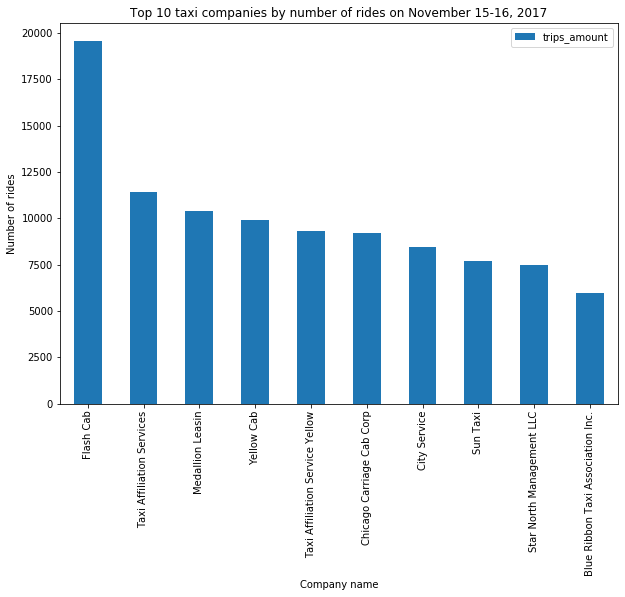

In [25]:
# plot the hist for "df_taxi_nov"
df_taxi_nov.head(10).plot(kind='bar', x='company_name', y='trips_amount', figsize=(10, 7), title='Top 10 taxi companies by number of rides on November 15-16, 2017')
plt.xlabel('Company name')
plt.ylabel('Number of rides')
plt.show()

*Plot the hist for the neighborhoods.*

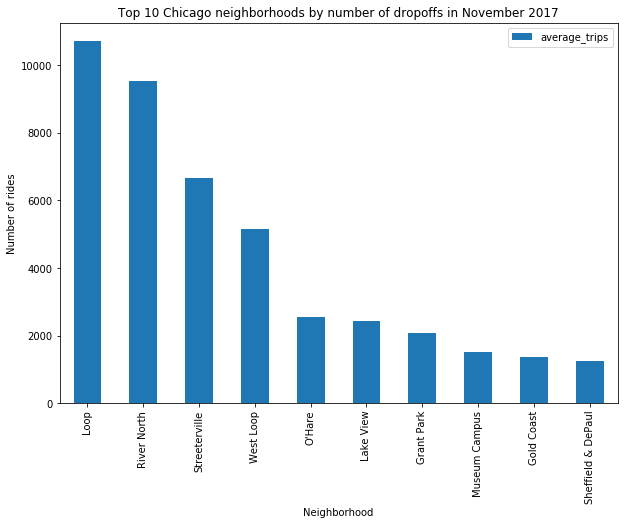

In [26]:
# plot the hist for "df_areas"
df_areas.head(10).plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(10, 7), title='Top 10 Chicago neighborhoods by number of dropoffs in November 2017')
plt.xlabel('Neighborhood')
plt.ylabel('Number of rides')
plt.show()

### Conclusion

We see:
- "Flash Cab" has maximum number of rides = 19558.
-  Area "Loop" is the most popular area. We have 10727 rides.

### Step 3. Testing hypotheses

*hypotheses*:  
- *H0*: The average duration of rides from Loop neighborhood to O'Hare International Airport doesn't change on rainy Sundays.  
- *H1*: The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays. 


Threshold p-value = 0.05.

In [27]:
# create 2 dataframes for "Good" and "Bad" weather
df_loop_ohare_good = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Good']['duration_seconds']
df_loop_ohare_bad = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Bad']['duration_seconds']

In [28]:
# calculate mean "duration_seconds" for "Good" and "Bad" weather
print(df_loop_ohare_good.mean().round(2))
print(df_loop_ohare_bad.mean().round(2))

2013.28
2427.21


We'll be use "ttest_ind" - two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [29]:
alpha = .05 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        df_loop_ohare_good, 
        df_loop_ohare_bad)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.3318772977743245e-11
We reject the null hypothesis


That means the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays.

### Step 4. Overall conclusion

*The main task:*

We want to understand passenger preferences and the impact of external factors on rides..

*Conclusion:*
- We've established top 10 Chicago taxi companies by number of rides on November 15-16, 2017. The most popular companies are Flash Cab, Taxi Affiliation Services, Medallion Leasin.
- We've established top 10 Chicago neighborhoods by number of dropoffs in November 2017. The most popular areas are Loop, River North, Streeterville.
- The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays.